# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,Unnamed: 4_x,Unnamed: 5_x,Unnamed: 6_x,Unnamed: 7_x,Unnamed: 8_x,Unnamed: 9_x,...,Unnamed: 246_y,Unnamed: 247_y,Unnamed: 248_y,Unnamed: 249_y,Unnamed: 250_y,Unnamed: 251_y,Unnamed: 252_y,Unnamed: 253_y,Unnamed: 254_y,Unnamed: 255_y
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Deliverable 1: Get a Summary DataFrame 

In [3]:
#  1. Get the total rides for each city type
total_ride_count = pyber_data_df.groupby(["type"]).count()["ride_id"]

In [4]:
# 2. Get the total drivers for each city type
total_driver_count = pyber_data_df.groupby(["type"]).sum()["driver_count"]

In [5]:
#  3. Get the total amount of fares for each city type
total_fares = pyber_data_df.groupby(["type"]).sum()["fare"]

In [6]:
#  4. Get the average fare per ride for each city type. 
avg_fare_per_ride = total_fares / total_ride_count

In [7]:
# 5. Get the average fare per driver for each city type. 
avg_fare_per_driver = total_fares / total_driver_count

In [8]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df = pd.DataFrame({"Total Rides": total_ride_count,
                    "Total Drivers": total_driver_count,
                    "Total Fares": total_fares,
                    "Average Fare per Ride": avg_fare_per_ride,
                    "Average Fare per Driver": avg_fare_per_driver})

pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,537,4327.93,34.623440,8.059460
Suburban,625,8570,19356.33,30.970128,2.258615
Urban,1625,59602,39854.38,24.525772,0.668675


In [9]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [10]:
#  8. Format the columns.
# Formatting the columns gave an error and used the correct syntax

## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [11]:
# 1. Read the merged DataFrame
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

In [12]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
total_fare_date = pyber_data_df.groupby(["type", "date"]).sum()[["fare"]]

In [13]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
total_fare_date = total_fare_date.reset_index()

In [14]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
total_fare_date_pivot = total_fare_date.pivot(index='date', columns='type', values='fare')

In [15]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
total_fare_date_range = total_fare_date_pivot.loc['2019-01-01':'2019-04-29']


In [16]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
total_fare_date_range.index = pd.to_datetime(total_fare_date_range.index)

In [17]:
# 7. Check that the datatype for the index is datetime using df.info()
total_fare_date_range.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


In [18]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
total_fare_date_range_week = total_fare_date_range.resample("W").sum()

total_fare_date_range_week

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


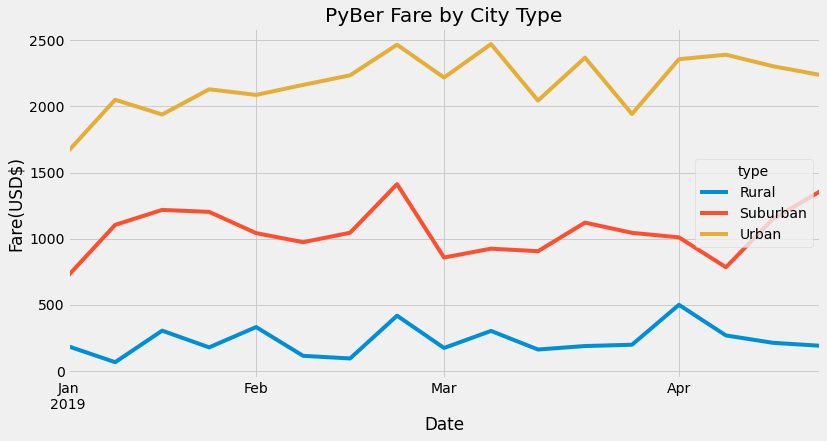

<Figure size 432x288 with 0 Axes>

In [21]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 
ax = total_fare_date_range_week.plot(figsize =(12,6))

# Add title and axes labels
ax.set_title("PyBer Fare by City Type")
ax.set_ylabel("Fare(USD$)")
ax.set_xlabel("Date")


plt.show()

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')


#Save the figure

plt.savefig("Analysis/PyBer_fare_summary.png")